# Building-level key metrics with interaction with Covid impact category and weather

## Section 1: Data Setup

In [2]:
# load in local helper functions
from utils.data_utils import (
    clean_property_type,
    concurrent_buildings,
    covid_impact_category,
    load_data,
)

In [3]:
import pandas as pd

# Load the data loader function
energy_data = load_data()

# Energy subset that includes only concurrent buildings appear across 2016-2023
energy_data = concurrent_buildings(energy_data, 2016, 2023)
energy_data = clean_property_type(energy_data)

print(
    f"Loaded dataset with {energy_data.shape[0]:,} rows and {energy_data.shape[1]} columns."
)
energy_data.head()

Loaded dataset with 18,904 rows and 30 columns.


,Data Year,ID,Property Name,Address,ZIP Code,Community Area,Primary Property Type,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,...,Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location,Reporting Status,Chicago Energy Rating,Exempt From Chicago Energy Rating,Water Use (kGal),Row_ID
24486,2016,116336,lasalle private residences,1212 N LaSalle,60610,near north side,multifamily housing,367627.0,1986.0,1.0,...,2575.3,7.0,41.904201,-87.633825,point (-87.63382507 41.90420084),nan,NaN,nan,NaN,nan
24496,2016,101745,161 north clark,161 North Clark,60601,loop,office,1200836.0,1992.0,1.0,...,15498.4,12.9,41.884905,-87.630518,point (-87.6305179 41.88490511),nan,NaN,nan,NaN,nan
24495,2016,101448,1401 w roosevelt - 2017 resubmit,1401 W. Roosevelt,60608,near west side,multifamily housing,69385.0,2006.0,1.0,...,242.4,3.5,41.849153,-87.670896,point (-87.67089596 41.84915346),nan,NaN,nan,NaN,nan
24494,2016,159892,promontory corporation,5530-5532 S Shore Drive,60637,hyde park,multifamily housing,180351.0,1949.0,1.0,...,1317.3,7.3,41.794687,-87.580465,point (-87.58046479 41.794687),nan,NaN,nan,NaN,nan
24493,2016,103602,190 south lasalle,190 South LaSalle,60603,loop,office,882560.0,1985.0,1.0,...,11519.9,13.1,41.879756,-87.632687,point (-87.63268685 41.8797561),nan,NaN,nan,NaN,nan


Load in the refactored data_utils.py to load the energy dataset. The default dataset is the concurrent buildings after 2016.

In [4]:
energy_data = energy_data[
    energy_data["Primary Property Type"].notna()
    & (energy_data["Primary Property Type"].str.lower() != "nan")
]
print(energy_data.shape)

energy_data.groupby("Primary Property Type")["ID"].nunique().reset_index().sort_values(
    by="ID", ascending=False
).head(10)

(18760, 30)


,Primary Property Type,ID
23,multifamily housing,1169
15,k-12 school,379
27,office,313
3,college/university,75
13,hotel,67
46,senior care community,52
45,retail store,51
49,supermarket/grocery store,48
21,mixed use property,36
28,other,29


Check the top property types to see the composition of buildings in this period.

In [5]:
energy_data = covid_impact_category(energy_data)
energy_data.head()

2025-11-12 20:16:59,011 [INFO] ✅ COVID Impact Category assignment (with 'Other' group) complete.
2025-11-12 20:16:59,014 [INFO] Category counts:
COVID Impact Category
Other                    510
Permanent               2461
Stable/Increased       10217
Temporary/Rebounded     5572


,Data Year,ID,Property Name,Address,ZIP Code,Community Area,Primary Property Type,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,...,GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location,Reporting Status,Chicago Energy Rating,Exempt From Chicago Energy Rating,Water Use (kGal),Row_ID,COVID Impact Category
24486,2016,116336,lasalle private residences,1212 N LaSalle,60610,near north side,multifamily housing,367627.0,1986.0,1.0,...,7.0,41.904201,-87.633825,point (-87.63382507 41.90420084),nan,NaN,nan,NaN,nan,Stable/Increased
24496,2016,101745,161 north clark,161 North Clark,60601,loop,office,1200836.0,1992.0,1.0,...,12.9,41.884905,-87.630518,point (-87.6305179 41.88490511),nan,NaN,nan,NaN,nan,Permanent
24495,2016,101448,1401 w roosevelt - 2017 resubmit,1401 W. Roosevelt,60608,near west side,multifamily housing,69385.0,2006.0,1.0,...,3.5,41.849153,-87.670896,point (-87.67089596 41.84915346),nan,NaN,nan,NaN,nan,Stable/Increased
24494,2016,159892,promontory corporation,5530-5532 S Shore Drive,60637,hyde park,multifamily housing,180351.0,1949.0,1.0,...,7.3,41.794687,-87.580465,point (-87.58046479 41.794687),nan,NaN,nan,NaN,nan,Stable/Increased
24493,2016,103602,190 south lasalle,190 South LaSalle,60603,loop,office,882560.0,1985.0,1.0,...,13.1,41.879756,-87.632687,point (-87.63268685 41.8797561),nan,NaN,nan,NaN,nan,Permanent


Grouped each property type into a COVID impact category to help distinguish the effect of COVID and placard system.

In [6]:
# Keep only top 10 most common property types overall
top_types = energy_data["Primary Property Type"].value_counts().nlargest(10).index

top_energy = energy_data[energy_data["Primary Property Type"].isin(top_types)].copy()
print(top_energy.shape)
top_energy.head()

(17173, 31)


,Data Year,ID,Property Name,Address,ZIP Code,Community Area,Primary Property Type,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,...,GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location,Reporting Status,Chicago Energy Rating,Exempt From Chicago Energy Rating,Water Use (kGal),Row_ID,COVID Impact Category
24486,2016,116336,lasalle private residences,1212 N LaSalle,60610,near north side,multifamily housing,367627.0,1986.0,1.0,...,7.0,41.904201,-87.633825,point (-87.63382507 41.90420084),nan,NaN,nan,NaN,nan,Stable/Increased
24496,2016,101745,161 north clark,161 North Clark,60601,loop,office,1200836.0,1992.0,1.0,...,12.9,41.884905,-87.630518,point (-87.6305179 41.88490511),nan,NaN,nan,NaN,nan,Permanent
24495,2016,101448,1401 w roosevelt - 2017 resubmit,1401 W. Roosevelt,60608,near west side,multifamily housing,69385.0,2006.0,1.0,...,3.5,41.849153,-87.670896,point (-87.67089596 41.84915346),nan,NaN,nan,NaN,nan,Stable/Increased
24494,2016,159892,promontory corporation,5530-5532 S Shore Drive,60637,hyde park,multifamily housing,180351.0,1949.0,1.0,...,7.3,41.794687,-87.580465,point (-87.58046479 41.794687),nan,NaN,nan,NaN,nan,Stable/Increased
24493,2016,103602,190 south lasalle,190 South LaSalle,60603,loop,office,882560.0,1985.0,1.0,...,13.1,41.879756,-87.632687,point (-87.63268685 41.8797561),nan,NaN,nan,NaN,nan,Permanent


## Section 2: Explore Weather-Normalized Trends

In [1]:
from utils.plot_utils import plot_metric_by_property

In [8]:
median_s = plot_metric_by_property(
    df=top_energy,
    metric_col="Site EUI (kBtu/sq ft)",
    agg_func=pd.Series.median,
)
median_s

alt.LayerChart(...)

In [7]:
median_site = plot_metric_by_property(
    df=top_energy,
    metric_col="Weather Normalized Site EUI (kBtu/sq ft)",
    agg_func=pd.Series.median,
)
median_site

alt.LayerChart(...)

* Before 2019, trends are relatively flat or slightly declining, meaning energy usage per square foot was stable.
* Around 2019–2020, nearly all property types show noticeable downward movement — a sharp efficiency gain or usage drop. Office, K-12 school, and residence halls/dormitories show the clearest drop.
* After 2021, some rebound appears (especially offices), consistent with post-pandemic reopening.

Site EUI reductions around 2019–2020 suggest both short-term behavioral changes (pandemic) and medium-term efficiency improvements (possible placard-driven awareness).
The persistence after 2021 varies — a sign that placard-inspired improvements may have lasted for some property types even after occupancy returned.

In [ ]:
year_2019 = 2019
top_energy[top_energy["Data Year"] == year_2019][
    "Weather Normalized Source EUI (kBtu/sq ft)"
]

7277   NaN
6603   NaN
6604   NaN
6605   NaN
6607   NaN
        ..
5416   NaN
5305   NaN
5303   NaN
5300   NaN
5299   NaN
Name: Weather Normalized Source EUI (kBtu/sq ft), Length: 2133, dtype: float64

Missing data for weather normalized source EUI in 2019.

Similar tendency as Site EUI. 
The placard system likely encouraged awareness-driven efficiency before COVID, while the pandemic accelerated short-term energy reductions.
The post-COVID persistence implies that behavioral and infrastructural changes initiated by the placard policy may have “locked in” efficiency gains in certain property types.

## Section 3: Interaction of Post-placards energy usage and Property categories

While previous exploratory analysis of the trend of energy persistence across property types provides some information about how different properties would respond to the introduction of placards system and the corresponding trends of energy usage across time, it needs closer research to see the changes of energy usage with respect to property types. 

We will uncover clearer causal and correlational links between the Chicago Energy Rating Placards (2019) system and changes in energy usage through statistical modelling of interaction terms.
* Placard introduction (post-2019) × Property Type
* Placard introduction × COVID Impact Category
* Placard introduction × ENERGY STAR Score

In [12]:
# prepare the key indicator variables for model
cols = [
    "Data Year",
    "Primary Property Type",
    "COVID Impact Category",
    "ENERGY STAR Score",
    "Weather Normalized Site EUI (kBtu/sq ft)",
]
energy = top_energy[cols].dropna(subset=["Weather Normalized Site EUI (kBtu/sq ft)"])

year_2020 = 2020
energy["post_placard"] = (energy["Data Year"] >= year_2019).astype(int)
energy["post_covid"] = (energy["Data Year"] >= year_2020).astype(int)

We use statsmodels OLS (ordinary least squares). The models includes: 
- The main effect of post_placard
- The main effect of *key indicator* we picked
- Their interaction to test whether the placard effect differs by the *key indicator*

The model performance is trained on the weather normalized Site EUI.

$$
EUI = \beta_0 + \beta_1(\text{post\_placard})
     + \beta_2(\text{indicator})
     + \beta_3(\text{post\_placard} \times \text{indicator})
     + \beta_4(\text{Energy Star Score})
     + \varepsilon
$$

**Model 1: Test if different property types responded differently to the 2019 placard system.**

The baseline property type is college/university.

In [13]:
# Model 1 – Placard × Property Type

import statsmodels.formula.api as smf

model1 = smf.ols(
    """
    Q('Weather Normalized Site EUI (kBtu/sq ft)') ~
    post_placard * C(Q('Primary Property Type')) +
    Q('ENERGY STAR Score')
    """,
    data=energy,
).fit(cov_type="HC3")

print(model1.summary())

                                          OLS Regression Results                                         
Dep. Variable:     Q('Weather Normalized Site EUI (kBtu/sq ft)')   R-squared:                       0.467
Model:                                                       OLS   Adj. R-squared:                  0.466
Method:                                            Least Squares   F-statistic:                 1.173e+04
Date:                                           Tue, 11 Nov 2025   Prob (F-statistic):               0.00
Time:                                                   22:48:10   Log-Likelihood:                -67155.
No. Observations:                                          13612   AIC:                         1.343e+05
Df Residuals:                                              13593   BIC:                         1.345e+05
Df Model:                                                     18                                         
Covariance Type:                              

/project/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 20, but rank is 19
  warnings.warn('covariance of constraints does not have full '


post_placard: average post-2019 change for the reference property type.

C(Primary Property Type)[T.X]: baseline difference (before 2019).

post_placard:C(Primary Property Type)[T.X]: how much extra the placard effect differs for property type X vs. baseline.

🔻 Negative = greater efficiency improvement. Eg: Offices

🔺 Positive = smaller improvement or increase. Eg: residence hall/dormitory

After controlling for property type and baseline energy performance, the Chicago Energy Rating Placard introduction in 2019 is associated with a small but meaningful decline in weather-normalized energy intensity across buildings (about 3 kBtu/sq ft on average).

**Model 2: Test if the placard effect depends on how buildings were affected by COVID.**

In [15]:
# Model 2 – Placard × COVID Impact Category

model2 = smf.ols(
    """
    Q('Weather Normalized Site EUI (kBtu/sq ft)') ~
    post_placard * C(Q('COVID Impact Category')) +
    Q('ENERGY STAR Score') + C(Q('Primary Property Type'))
    """,
    data=energy,
).fit(cov_type="HC3")

print(model2.summary())

                                          OLS Regression Results                                         
Dep. Variable:     Q('Weather Normalized Site EUI (kBtu/sq ft)')   R-squared:                       0.467
Model:                                                       OLS   Adj. R-squared:                  0.466
Method:                                            Least Squares   F-statistic:                 1.530e+04
Date:                                           Tue, 11 Nov 2025   Prob (F-statistic):               0.00
Time:                                                   22:52:21   Log-Likelihood:                -67158.
No. Observations:                                          13612   AIC:                         1.343e+05
Df Residuals:                                              13598   BIC:                         1.344e+05
Df Model:                                                     13                                         
Covariance Type:                              

/project/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 17, but rank is 14
  warnings.warn('covariance of constraints does not have full '


This suggests that once we control for how COVID affected each building group, the placard policy’s marginal impact on weather-normalized Site EUI becomes indistinguishable from noise.

Even though interactions aren’t significant, the main COVID category terms are highly significant — indicating that the energy profiles of “Temporary/Rebounded,” “Stable,” and “Permanent” groups differ strongly overall.

### 3.1: Compare models and visualize results

We will use the adjusted R² or ANOVA to check which model explains more variance.

In [29]:
from statsmodels.stats.anova import anova_lm

anova_lm(model1, model2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,13593.0,1.536917e+07,0.0,NaN,NaN,NaN
1,13598.0,1.537585e+07,-5.0,-6676.406388,1.180888,NaN


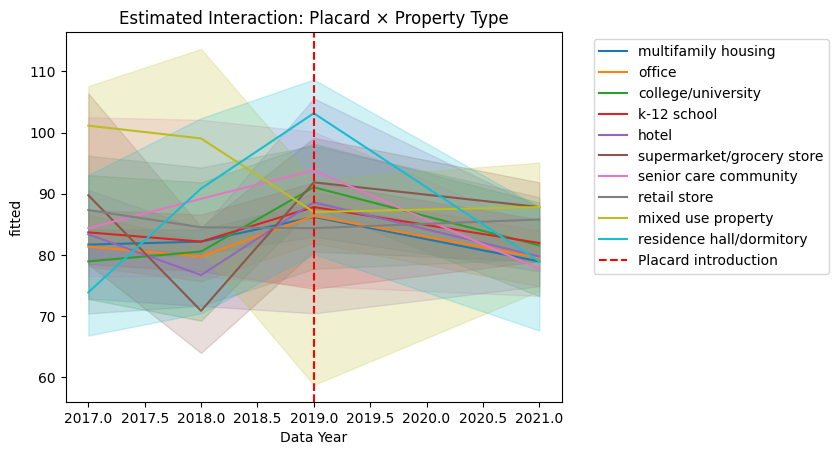

In [18]:
# visualize the interaction effect of placard x property type
import matplotlib.pyplot as plt
import seaborn as sns

pred = model1.get_prediction(energy).summary_frame(alpha=0.05)
energy["fitted"] = pred["mean"]

sns.lineplot(
    data=energy,
    x="Data Year",
    y="fitted",
    hue="Primary Property Type",
    estimator="median",
)
plt.axvline(2019, color="red", linestyle="--", label="Placard introduction")
plt.title("Estimated Interaction: Placard × Property Type")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

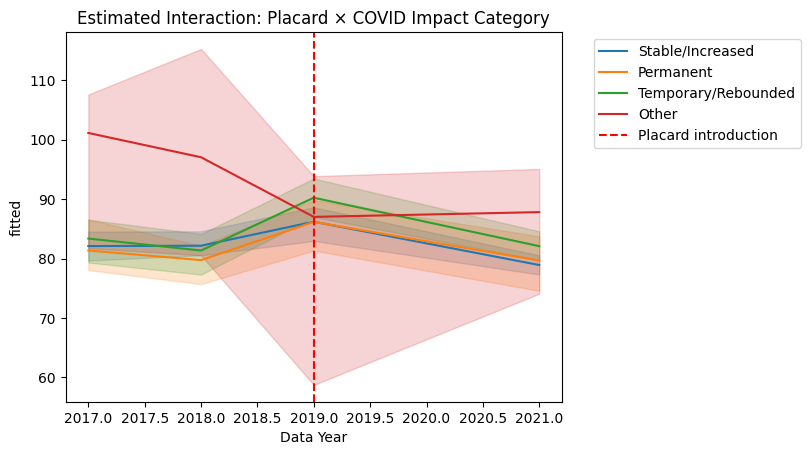

In [26]:
# visualize the interaction effect of placard x COVID impact category

pred = model2.get_prediction(energy).summary_frame(alpha=0.05)
energy["fitted"] = pred["mean"]

sns.lineplot(
    data=energy,
    x="Data Year",
    y="fitted",
    hue="COVID Impact Category",
    estimator="median",
)
plt.axvline(2019, color="red", linestyle="--", label="Placard introduction")
plt.title("Estimated Interaction: Placard × COVID Impact Category")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

## Section 4: Interpretation

After accounting for property type, pre-existing efficiency, and COVID impact categories, the 2019 Chicago Energy Rating Placard system does not show a statistically significant overall effect on weather-normalized energy intensity.

However, the placard policy may still have affected specific subgroups (like offices, as seen in your previous model), or its effect may have been masked by pandemic-era volatility in building operations (especially in the Temporary/Rebounded group).

**Next Step**: As all the models we fit is comparing to the default baseline - pre-2019, Property Type (College/university), covid (Other), the result measures how placard effect differs for the group relative to the baseline.
- Model refinement (change groups as reference)
- Trained model using within-building variation
- Control help DID